In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [2]:
#df.to_csv('XIACF.csv') --> for saving the data into csv format
df = pd.read_csv('XIACF.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,XIACF,2018-08-21 00:00:00+00:00,2.30,2.30,2.30,2.30,8784200,2.30,2.30,2.30,2.30,8784200,0.0,1.0
1,XIACF,2018-08-22 00:00:00+00:00,2.70,3.50,2.27,2.30,116872,2.70,3.50,2.27,2.30,116872,0.0,1.0
2,XIACF,2018-08-23 00:00:00+00:00,2.35,3.00,2.20,2.68,7406506,2.35,3.00,2.20,2.68,7406506,0.0,1.0
3,XIACF,2018-08-24 00:00:00+00:00,2.22,2.60,2.22,2.60,4898137,2.22,2.60,2.22,2.60,4898137,0.0,1.0
4,XIACF,2018-08-27 00:00:00+00:00,2.35,2.65,2.23,2.30,105011,2.35,2.65,2.23,2.30,105011,0.0,1.0


In [3]:
df.shape

(762, 14)

In [4]:
df_close = df.reset_index()['close']
df_close

0      2.3000
1      2.7000
2      2.3500
3      2.2200
4      2.3500
        ...  
757    3.3400
758    3.1800
759    3.2100
760    3.2399
761    3.2000
Name: close, Length: 762, dtype: float64

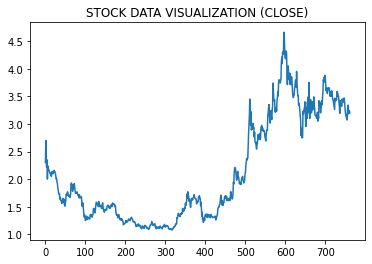

In [5]:
plt.plot(df_close)
plt.title('STOCK DATA VISUALIZATION (CLOSE)')
plt.show()

In [6]:
#Scalling --> set the value between -1 to 1
sc = MinMaxScaler()
df_close_scaled = sc.fit_transform(np.array(df_close).reshape(-1, 1))
df_close_scaled

array([[0.34078212],
       [0.45251397],
       [0.3547486 ],
       [0.31843575],
       [0.3547486 ],
       [0.25698324],
       [0.32402235],
       [0.31284916],
       [0.30726257],
       [0.30167598],
       [0.29608939],
       [0.2877095 ],
       [0.2877095 ],
       [0.27932961],
       [0.27374302],
       [0.27092179],
       [0.29050279],
       [0.29608939],
       [0.29050279],
       [0.2849162 ],
       [0.29189944],
       [0.29608939],
       [0.30167598],
       [0.29329609],
       [0.29329609],
       [0.2849162 ],
       [0.27094972],
       [0.25698324],
       [0.25977654],
       [0.24022346],
       [0.23463687],
       [0.2122905 ],
       [0.20391061],
       [0.18435754],
       [0.18156425],
       [0.18435754],
       [0.15642458],
       [0.16480447],
       [0.15083799],
       [0.14804469],
       [0.1452514 ],
       [0.13407821],
       [0.1396648 ],
       [0.15921788],
       [0.1396648 ],
       [0.1424581 ],
       [0.15642458],
       [0.136

In [7]:
#train-test-split --> splitting the data into train & test
train_size = int(len(df_close_scaled) * 0.70)  #define 70% of the original data as our training data 
test_size  = len(df_close_scaled) - train_size #30% of the remaining data as our testing data 

[train, test] = df_close_scaled[0:train_size,:], df_close_scaled[train_size:len(df_close_scaled), :1]

print(train.shape)
print(test.shape)

(533, 1)
(229, 1)


In [8]:
def mydataset(mydf, time_stamp=1):
    X_data, y_data = [], []
    for i in range(len(mydf) - time_stamp-1):
        value = mydf[i:(i+time_stamp), 0]
        X_data.append(value)
        y_data.append(mydf[i+time_stamp, 0])
    return np.array(X_data), np.array(y_data)

In [9]:
time_stamp = 100
[X_train, y_train] = mydataset(train, time_stamp)
[X_test, y_test] = mydataset(test, time_stamp)

print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)
print("X test shape: ",X_test.shape)
print("y test shape: ",y_test.shape)

X train shape:  (432, 100)
y train shape:  (432,)
X test shape:  (128, 100)
y test shape:  (128,)


In [11]:
#reshaping the train and test data into 3 dimentional structure for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test  = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape, X_test.shape)

(432, 100, 1) (128, 100, 1)


In [32]:
#Stacked LSTM Model
lstm_model = Sequential()
lstm_model.add(LSTM(80, return_sequences = True, input_shape = (100, 1)))
lstm_model.add(LSTM(80, return_sequences = True))
lstm_model.add(LSTM(80))

lstm_model.add(Dense(1))

In [33]:
#model compilation
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
#model summary
lstm_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_8 (LSTM)                (None, 100, 80)           26240     
_________________________________________________________________
lstm_9 (LSTM)                (None, 100, 80)           51520     
_________________________________________________________________
lstm_10 (LSTM)               (None, 80)                51520     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 81        
Total params: 129,361
Trainable params: 129,361
Non-trainable params: 0
_________________________________________________________________


In [35]:
#model fitting
lstm_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
14/14 [==============================] - 4s 76ms/step - loss: 0.0085 - val_loss: 0.0728
Epoch 2/100
14/14 [==============================] - 0s 21ms/step - loss: 0.0034 - val_loss: 0.0067
Epoch 3/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0030 - val_loss: 0.0075
Epoch 4/100
14/14 [==============================] - 0s 21ms/step - loss: 0.0018 - val_loss: 0.0044
Epoch 5/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0018 - val_loss: 0.0046
Epoch 6/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0014 - val_loss: 0.0030
Epoch 7/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0013 - val_loss: 0.0036
Epoch 8/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0012 - val_loss: 0.0036
Epoch 9/100
14/14 [==============================] - 0s 22ms/step - loss: 0.0010 - val_loss: 0.0039
Epoch 10/100
14/14 [==============================] - 0s 21ms/step - loss: 0.0012 - val_loss: 0.0060

14/14 [==============================] - 0s 21ms/step - loss: 2.7915e-04 - val_loss: 0.0018
Epoch 80/100
14/14 [==============================] - 0s 21ms/step - loss: 2.7346e-04 - val_loss: 0.0024
Epoch 81/100
14/14 [==============================] - 0s 22ms/step - loss: 2.6623e-04 - val_loss: 0.0026
Epoch 82/100
14/14 [==============================] - 0s 21ms/step - loss: 3.0226e-04 - val_loss: 0.0023
Epoch 83/100
14/14 [==============================] - 0s 21ms/step - loss: 2.7633e-04 - val_loss: 0.0020
Epoch 84/100
14/14 [==============================] - 0s 21ms/step - loss: 2.6464e-04 - val_loss: 0.0041
Epoch 85/100
14/14 [==============================] - 0s 22ms/step - loss: 2.5900e-04 - val_loss: 0.0042
Epoch 86/100
14/14 [==============================] - 0s 21ms/step - loss: 2.5868e-04 - val_loss: 0.0025
Epoch 87/100
14/14 [==============================] - 0s 22ms/step - loss: 2.7978e-04 - val_loss: 0.0025
Epoch 88/100
14/14 [==============================] - 0s 22ms/step -

In [36]:
#prediction
prediction_on_train = lstm_model.predict(X_train)
prediction_on_test  = lstm_model.predict(X_test)

In [37]:
#inverse transformation --> back to the original format
pred_train = sc.inverse_transform(prediction_on_train)
pred_test  = sc.inverse_transform(prediction_on_test)

In [41]:
#rmse on train data 
print("RMSE for train data: ", mean_squared_error(y_train, pred_train, squared=False))
#rmse on test data 
print("RMSE for test data: ", mean_squared_error(y_test, pred_test, squared=False))

RMSE for train data:  1.4323512593636911
RMSE for test data:  2.9610655919711864
